<a href="https://colab.research.google.com/github/eslivko/NLP_Project_Topic_modeling/blob/main/topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of topic modeling techniques. 

###Topic and goal
The goal of this project is to model topics using variety of techniques including pretrained models such as BERT or XLNet for embeddings generation and to compare results and performance of different approaches.

### Dataset
The part (50000 articles in english) of wikipedia dataset 
https://www.lateral.io/resources-blog/the-unknown-perils-of-mining-wikipedia was used.
Articles do not have labels and represent a huge amount of topics.

### Steps of the project:

1.	Data preprocessing

2.	LDA topic modeling

4.	BERTopic with SentenceTransformer "distilbert-base-nli-mean-tokens" Embeddings
4.1.	Generation of BERT embeddings
4.2.	Dimensionality reduction with UMAP
4.3.	Clustering with HDBSCAN
4.4.	Topic representation based on class-based TF-IDF score

5.	BERTopic with SentenceTransformer "all-MiniLM-L6-v2" Embeddings
5.1.	Generation of BERT embeddings ()
5.2.	Dimensionality reduction with UMAP
5.3.	Clustering with HDBSCAN
5.4.	Topic representation based on class-based TF-IDF score



### Performance measure
when choosing a measure of coherence, I used the articles "Exploring the Space of Topic Coherence Measures" by M. Röder et al (http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf).
According to the study, the Coherence measure C_npmi that utilise normalized pointwise mutual information showed one of the best overall performance and was chosen as a performance measure for this project. 


### Computational issues
Due to the size of the dateset, I faced computational issues in the calculations.
Unfortunately I did not succeed to create TopToVec model, BERTopic with XLNet embeddings and to build LDA Mallet on the same dataset.


### Main outcomes
The comparison of the models showed that the topic models are very sensetive to the changes of paramataers and hyperparameters. 
Depending on the purpose of modeling, it is possible to create a model with more granular topics or more generalized ones.
LDA model with default parameters generated 100 well-interpretable and understandable topics.
The search for the optimal number of topics showed that 50 topics is more optimal for a given dataset based on the coherence measure.

On the intertopic distance map presented for BERTopic models we can observe scattered clusters of close or similar topics that could be successfully combined.
Nevertheless, after dimensionality reduction and clustering а huge amount of articles (>30%) we classified as outliers, which means that they were aggregated to a mutual fragmented class.

BERTopic models with distilbert and all-MiniLM-L6-v2 embeddings generated 137 and 175 topics correspondingly.

Maximum number of documents in the topic is 1252 in BERTopic model with distilbert embeddings and 3328 in BERTopic model with all-MiniLM-L6-v2.
Minimum number of documents in the topic was set to 25.
on the example of 3 largest and 3 smallest topics  (by the number of documents in the topic) we can see that all topics are well interpretable. "Large" topics represent broad subjects (software and programming, business, TV, movies and actors, music, animals), while "small" topics represent specialized questions (encoding and fonts, taxes, healthcare)

Comparison of models based on coherent measures is presented in the last section "Topic models assessment" of the project.




 ### Possible development of the project

For a date set as vast and varied as wikipedia, it is worth considering the possibility of hierarchical theme modeling (hierarchical topic modeling (hierarchical latent Dirichlet allocation (hLDA), hierarchical additive regularization of topic models  (ARTM), etc.). 



# Installation and Import of libraries

In [2]:
from google.colab import drive

root_path = '/content/drive'
drive.mount(root_path)

Mounted at /content/drive


In [3]:
!pip install sentence_transformers

     |████████████████████████████████| 85 kB 2.1 MB/s 
     |████████████████████████████████| 2.9 MB 15.3 MB/s 
     |████████████████████████████████| 1.2 MB 49.4 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 636 kB 55.5 MB/s 
     |████████████████████████████████| 3.3 MB 14.3 MB/s 
     |████████████████████████████████| 895 kB 67.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126710 sha256=2daf1a4ea8c0d6acbbb964adc286283ef4e6a65fbe2a39b74a17d473d0073fd0
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
!pip install umap-learn

     |████████████████████████████████| 80 kB 1.2 MB/s 
     |████████████████████████████████| 1.1 MB 2.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=e0f4262db0c2e32e79789813a769103fdb0cfb94441df9ad8c38d21ea3ef27f7
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=6b5950792659947c173315f6513acf521b66832d6409ad3de95e4b81d3a517fa
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [5]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 2.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311881 sha256=30d582d7f86299c9cd6974b64ecbc93e7fefe85fe541b3908515cb17d33cb0fb
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [6]:
!pip install --upgrade gensim==3.8

     |████████████████████████████████| 24.2 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [7]:
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [8]:
!curl -O https://raw.githubusercontent.com/deepjavalibrary/d2l-java/master/tools/colab_build.sh && bash colab_build.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   520  100   520    0     0   1290      0 --:--:-- --:--:-- --:--:--  1287
Update environment...
Install Java...
Install Jupyter java kernel...


In [9]:
#java --list-modules | grep "jdk.jshell"

In [10]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-09-30 03:20:44--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  5.39MB/s    in 2.9s    

2021-09-30 03:20:47 (5.39 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [11]:
!pip install bertopic

     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 13.2 MB 7.2 MB/s 
  Using cached numpy-1.21.2-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [12]:
!pip install bertopic[visualization]

In [13]:
!pip install flair

     |████████████████████████████████| 319 kB 2.7 MB/s 
     |████████████████████████████████| 48 kB 4.8 MB/s 
     |████████████████████████████████| 64 kB 2.4 MB/s 
     |████████████████████████████████| 788 kB 39.8 MB/s 
     |████████████████████████████████| 981 kB 38.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.7 MB 1.3 MB/s 
     |████████████████████████████████| 1.2 MB 35.2 MB/s 
     |████████████████████████████████| 62 kB 761 kB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=b340c1a3a37db11978070f773244bc3f4ffdebbb1ba8e38715e017c820fe337c
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=0d3dc3cb7bbdce8ba9463cf367a1f1fcffa4c6b8bd09d9c09ca8df22b7b1f717
  Stored in dir

In [14]:
!pip install top2vec

In [15]:
pip install top2vec[sentence_transformers]

In [17]:
import umap.umap_ as umap
import hdbscan
import os
import sys
import pickle
import matplotlib.pyplot as plt

import pandas as pd

import nltk
from nltk import word_tokenize
import re

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopword_list = list(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer

import gensim
from gensim import corpora, models 
#from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities

from bertopic import BERTopic
from flair.embeddings import BertEmbeddings, XLNetEmbeddings
from flair.embeddings import TransformerDocumentEmbeddings
from flair.data import Sentence
from sentence_transformers import SentenceTransformer

from top2vec import Top2Vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
os.environ['MALLET_HOME'] = '/content/drive/MyDrive/FU_NLP_Project/mallet-2.0.8'
mallet_path = '/content/drive/MyDrive/FU_NLP_Project/mallet-2.0.8/bin/mallet' # you should NOT need to change this 

# Useful Functions

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)

# Topic modeling

## Data import

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FU_NLP_Project/data/wiki_sample.csv')

In [ ]:
data.columns = ['index','id','article']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   index    100000 non-null  int64 
 1   id       100000 non-null  object
 2   article  100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
data.drop(['index'], axis = 1, inplace = True)

In [ ]:
data.head()

id                                            article
0   wikipedia-4592186   Sheikhupura District  Shaikhupur District (),...
1  wikipedia-28634877   Isaac and Miria  Numerous publications in var...
2   wikipedia-2319918   Stewart's Melville College  Stewart's Melvill...
3   wikipedia-1788535   Khas people  Originally the Khas (खस) / Khasa...
4  wikipedia-19727355   Nicole Matthews  Nicole Matthews (born Januar...

In [ ]:
data.loc[0, 'article']

' Sheikhupura District  Shaikhupur District (), is a district of Punjab province, Pakistan. Shaikhupur is the headquarters of Shaikhupur District. According to the 1998 census of Pakistan, the district had a population of 3,321,029 of which 25.45% were urban. History. Shaikhupur District was agricultural region with forests during the Indus Valley Civilization. The Vedic period is characterized by Indo-Aryan culture that invaded from Central Asia and settled in Punjab region. The Kambojas, Daradas, Kaikayas, Madras, Pauravas, Yaudheyas, Malavas and Kurus invaded, settled and ruled ancient Punjab region. After overunning the Achaemenid Empire in 331 BCE, Alexander marched into present-day Punjab region with an army of 50,000. The Sheikhupura was ruled by Maurya Empire, Indo-Greek kingdom, Kushan Empire, Gupta Empire, White Huns, Kushano-Hephthalites and Shahi kingdoms.  In 997 CE, Sultan Mahmud Ghaznavi, took over the Ghaznavid dynasty empire established by his father, Sultan Sebuktegin

## Data preprocessing

In [95]:
def normalize_corpus(data, lowercase = True, remove_stop_words = True, remove_special_chars = True, stemming = False, lemmatization = True):
    stopword_list = nltk.corpus.stopwords.words('english')
    if stemming:
        ps = nltk.porter.PorterStemmer()
    if lemmatization:
        lemmatizer = WordNetLemmatizer()
    if remove_special_chars:
        pattern = r'[^a-zA-Z\s]|\[|\]'

    normalized_corpus = []
    normalized_corpus_tokens = []
    for doc in data:
        if remove_special_chars:
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = re.sub(pattern, '', doc) 
        if stemming:
            doc = ' '.join([ps.stem(word) for word in doc.split()])
        if lemmatization: 
            doc = ' '.join([lemmatizer.lemmatize(word) for word in doc.split()])
        if lowercase:
            doc = doc.lower()

        tokens = word_tokenize(doc)
        tokens = [token.strip() for token in tokens]

        if remove_stop_words:  
            if lowercase:
                tokens = [token for token in tokens if token not in stopword_list]
            else:
                tokens = [token for token in tokens if token.lower() not in stopword_list]
        doc = ' '.join(tokens)
        normalized_corpus.append(doc)
        normalized_corpus_tokens.append(tokens)

    return normalized_corpus,normalized_corpus_tokens

In [ ]:
articles = data.loc[0:,'article'].tolist()
articles[:10]

[' Sheikhupura District  Shaikhupur District (), is a district of Punjab province, Pakistan. Shaikhupur is the headquarters of Shaikhupur District. According to the 1998 census of Pakistan, the district had a population of 3,321,029 of which 25.45% were urban. History. Shaikhupur District was agricultural region with forests during the Indus Valley Civilization. The Vedic period is characterized by Indo-Aryan culture that invaded from Central Asia and settled in Punjab region. The Kambojas, Daradas, Kaikayas, Madras, Pauravas, Yaudheyas, Malavas and Kurus invaded, settled and ruled ancient Punjab region. After overunning the Achaemenid Empire in 331 BCE, Alexander marched into present-day Punjab region with an army of 50,000. The Sheikhupura was ruled by Maurya Empire, Indo-Greek kingdom, Kushan Empire, Gupta Empire, White Huns, Kushano-Hephthalites and Shahi kingdoms.  In 997 CE, Sultan Mahmud Ghaznavi, took over the Ghaznavid dynasty empire established by his father, Sultan Sebuktegi

In [ ]:
normalized_articles, tokens = normalize_corpus(articles)

In [ ]:
normalized_articles[:10]

['sheikhupura district shaikhupur district district punjab province pakistan shaikhupur headquarters shaikhupur district according census pakistan district population urban history shaikhupur district wa agricultural region forest indus valley civilization vedic period characterized indoaryan culture invaded central asia settled punjab region kambojas daradas kaikayas madras pauravas yaudheyas malavas kurus invaded settled ruled ancient punjab region overunning achaemenid empire bce alexander marched presentday punjab region army sheikhupura wa ruled maurya empire indogreek kingdom kushan empire gupta empire white huns kushanohephthalites shahi kingdom ce sultan mahmud ghaznavi took ghaznavid dynasty empire established father sultan sebuktegin conquered shahis kabul followed conquest punjab region delhi sultanate later mughal empire ruled region punjab region became predominantly muslim due missionary sufi saint whose dargahs dot landscape punjab region decline mughal empire sikh invad

In [ ]:
data['normalized_article'] = normalized_articles
data['tokens'] = tokens
data.to_csv('/content/drive/MyDrive/FU_NLP_Project/data/wiki_sample_normalized.csv', sep = '|')
data.head()

id  ...                                             tokens
0   wikipedia-4592186  ...  [sheikhupura, district, shaikhupur, district, ...
1  wikipedia-28634877  ...  [isaac, miria, numerous, publication, various,...
2   wikipedia-2319918  ...  [stewarts, melville, college, stewarts, melvil...
3   wikipedia-1788535  ...  [khas, people, originally, khas, khasas, khasi...
4  wikipedia-19727355  ...  [nicole, matthews, nicole, matthews, born, jan...

[5 rows x 4 columns]

In [ ]:
data = data.loc[0:49999]
data.to_csv('/content/drive/MyDrive/FU_NLP_Project/data/wiki_sample_normalized_small.csv', sep = '|')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          50000 non-null  int64 
 1   id                  50000 non-null  object
 2   article             50000 non-null  object
 3   normalized_article  50000 non-null  object
 4   tokens              50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [19]:
data = pd.read_csv('/content/drive/MyDrive/FU_NLP_Project/data/wiki_sample_normalized_small.csv', sep = '|')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

id  ...                                             tokens
0   wikipedia-4592186  ...  ['sheikhupura', 'district', 'shaikhupur', 'dis...
1  wikipedia-28634877  ...  ['isaac', 'miria', 'numerous', 'publication', ...
2   wikipedia-2319918  ...  ['stewarts', 'melville', 'college', 'stewarts'...
3   wikipedia-1788535  ...  ['khas', 'people', 'originally', 'khas', 'khas...
4  wikipedia-19727355  ...  ['nicole', 'matthews', 'nicole', 'matthews', '...

[5 rows x 4 columns]

In [20]:
normalized_article = data.loc[0:,'normalized_article'].tolist()

In [24]:
norm_tokenized_corpus = [row.split() for row in normalized_article]

In [25]:
dictionary = corpora.Dictionary(norm_tokenized_corpus)
print('Vocabulary Size:', len(dictionary))

Vocabulary Size: 689629


In [26]:
dictionary.filter_extremes(no_below=3, no_above=0.7)
print('Vocabulary Size:', len(dictionary))

Vocabulary Size: 100000


In [27]:
# convert tokenized documents into bag of words vectors
corpus = [dictionary.doc2bow(text) for text in norm_tokenized_corpus]

In [ ]:
with open('/content/drive/MyDrive/FU_NLP_Project/models/lda_corpus_small', 'wb') as corpus_file:
    pickle.dump(corpus, corpus_file)
with open('/content/drive/MyDrive/FU_NLP_Project/models/lda_dictionary_small', 'wb') as dict_file:
    pickle.dump(dictionary, dict_file)

In [ ]:
with open ('/content/drive/MyDrive/FU_NLP_Project/models/lda_corpus_small', 'rb') as corpus_file:
    corpus = pickle.load(corpus_file)
with open ('/content/drive/MyDrive/FU_NLP_Project/models/lda_dictionary_small', 'rb') as dict_file:
    dictionary = pickle.load(dict_file)    

In [ ]:
print([(dictionary[idx] , freq) for idx, freq in corpus[1][:30]])

[('area', 1), ('brought', 1), ('english', 4), ('feature', 1), ('ha', 6), ('headquarters', 1), ('language', 1), ('late', 1), ('later', 3), ('lower', 1), ('may', 1), ('part', 2), ('period', 1), ('small', 2), ('year', 3), ('ability', 1), ('able', 1), ('aboard', 2), ('accent', 1), ('action', 2), ('active', 1), ('actor', 3), ('adaptation', 2), ('add', 1), ('admit', 1), ('adr', 1), ('afterward', 3), ('aged', 1), ('agreed', 1), ('alcatraz', 1)]


In [ ]:
#Creation of dataframe with results:
res_columns = ['model', 'num_topics', 'c_npmi']
res_df = pd.DataFrame(columns = res_columns)
res_df.to_csv('/content/drive/MyDrive/FU_NLP_Project/results.csv', sep = '|')

# LDA

## LDA Topic model

In [ ]:
lda_model = models.LdaModel(
   corpus=corpus, 
   id2word=dictionary, 
   random_state=1, 
   chunksize=1000, 
   passes=10, 
   alpha='auto', 
   per_word_topics=True
)

In [ ]:
#save lda model:
#from gensim.test.utils import datapath
#temp_file = datapath("model")
lda_model.save('/content/drive/MyDrive/FU_NLP_Project/models/lda_model_')

In [ ]:
#load pretrained model:
#lda_model = models.LdaMode.load(temp_file)
lda_model = models.LdaModel.load('/content/drive/MyDrive/FU_NLP_Project/models/lda_model_')

In [ ]:
print("Number of topics in LDA model: ",lda_model.num_topics)

Number of topics in LDA model:  100


## LDA Topic model assessment based on Coherence measure

In [81]:
def compute_coherence(lda_model,  texts, corpus, dictionary, coherence_measure = 'c_npmi' ):
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence=coherence_measure)
    return coherence_model.get_coherence()

In [ ]:
CV = compute_coherence(lda_model, norm_tokenized_corpus, corpus, dictionary)
print(CV)

0.0701374417192893


In [ ]:
res_df = pd.read_csv('/content/drive/MyDrive/FU_NLP_Project/results.csv', sep = '|')
res_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
res_df = res_df.append({'model': 'LDA',
                        'num_topics': lda_model.num_topics,  'c_npmi': CV} , 
                    ignore_index=True)
res_df.to_csv('/content/drive/MyDrive/FU_NLP_Project/results.csv', sep = '|')

## Representation of LDA topics

In [ ]:
for topic_id in range(lda_model.num_topics):
    topk = lda_model.show_topic(topic_id,10)
    topk_words = [ w for w, _ in topk ]
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: world first team second win final time round two season
1: university school student college education program research ha science campus
2: los angeles williams van johnson clark california carson detroit allen
3: airport flight international passenger air airline service terminal airlines aircraft
4: drug effect use used ha study health medicine eruption agent
5: bank tax price money market financial cost debt value income
6: game player video released version character ha level feature mode
7: ship navy gun naval fleet fire two tank carrier vessel
8: de la spanish mexico spain el del mexican latin juan
9: japanese japan imperial emperor dynasty clan japans tang han postal
10: chinese china kong hong asia singapore asian thailand vietnam malaysia
11: india indian pakistan temple ha state tamil sri delhi hindu
12: used use type design made one weight often ha mm
13: service network code phone mobile number internet message communication information
14: country economic world millio

Topic #62:
0.239*"jones" + 0.094*"collins" + 0.056*"cent" + 0.052*"td" + 0.041*"crimson" + 0.032*"thumb" + 0.029*"fibre" + 0.028*"sur" + 0.028*"sterling" + 0.025*"dil" + 0.021*"sal" + 0.017*"norte" + 0.017*"phalanx" + 0.016*"whisky" + 0.016*"enshrined" + 0.016*"jenner" + 0.015*"asbestos" + 0.014*"vaughan" + 0.013*"uniformity" + 0.012*"barangay"


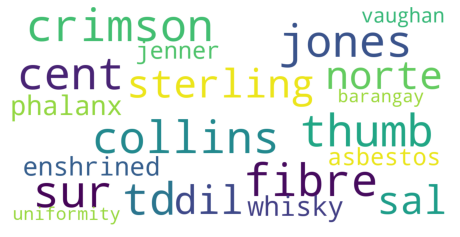

Topic #22:
0.044*"yard" + 0.026*"game" + 0.019*"touchdown" + 0.018*"season" + 0.018*"nfl" + 0.015*"bowl" + 0.013*"field" + 0.013*"first" + 0.013*"pas" + 0.012*"super" + 0.010*"quarter" + 0.010*"second" + 0.009*"lead" + 0.009*"goal" + 0.009*"quarterback" + 0.008*"play" + 0.008*"week" + 0.007*"line" + 0.007*"defensive" + 0.007*"back"


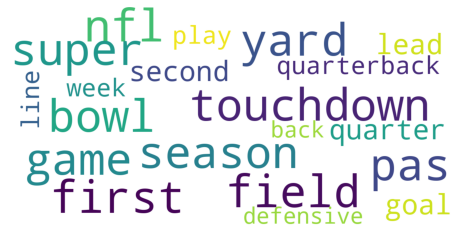

Topic #76:
0.104*"sweden" + 0.082*"swedish" + 0.077*"norway" + 0.073*"lake" + 0.071*"denmark" + 0.067*"danish" + 0.059*"norwegian" + 0.033*"dam" + 0.032*"iceland" + 0.028*"norse" + 0.023*"icelandic" + 0.023*"copenhagen" + 0.016*"scandinavian" + 0.014*"nordic" + 0.013*"scandinavia" + 0.013*"germanic" + 0.012*"graves" + 0.012*"hook" + 0.011*"christian" + 0.011*"saxon"


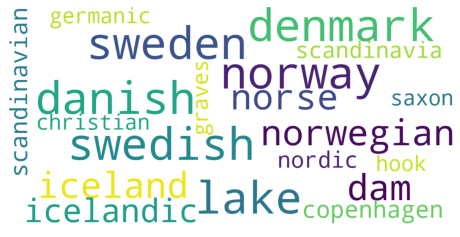

Topic #37:
0.016*"john" + 0.013*"david" + 0.013*"michael" + 0.010*"james" + 0.007*"jack" + 0.007*"brown" + 0.007*"peter" + 0.006*"tom" + 0.006*"paul" + 0.006*"martin" + 0.006*"scott" + 0.006*"tony" + 0.005*"taylor" + 0.005*"frank" + 0.005*"robert" + 0.005*"bill" + 0.005*"richard" + 0.005*"bob" + 0.005*"steve" + 0.005*"george"


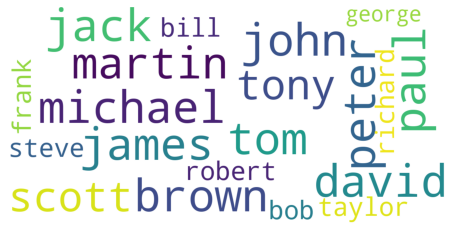

Topic #50:
0.012*"ha" + 0.008*"get" + 0.008*"one" + 0.008*"go" + 0.007*"take" + 0.006*"make" + 0.006*"find" + 0.006*"love" + 0.006*"back" + 0.006*"tell" + 0.006*"said" + 0.005*"come" + 0.005*"friend" + 0.005*"time" + 0.005*"like" + 0.005*"see" + 0.005*"say" + 0.004*"end" + 0.004*"however" + 0.004*"man"


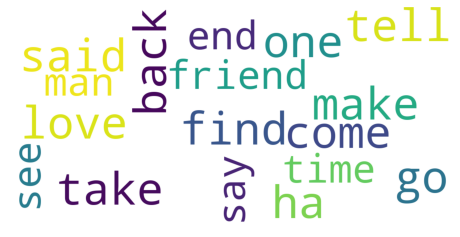

Topic #34:
0.021*"would" + 0.015*"time" + 0.013*"later" + 0.011*"year" + 0.010*"could" + 0.010*"one" + 0.008*"first" + 0.008*"became" + 0.008*"made" + 0.007*"two" + 0.007*"day" + 0.007*"took" + 0.006*"left" + 0.006*"death" + 0.006*"died" + 0.005*"began" + 0.005*"early" + 0.005*"many" + 0.005*"however" + 0.004*"went"


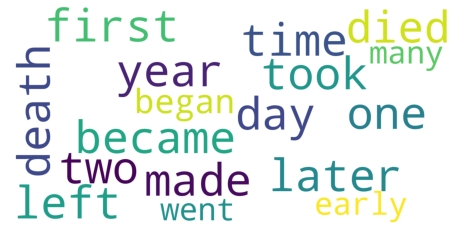

In [ ]:
for topic_id, topic in lda_model.print_topics(num_topics=6, num_words=20):
    print('Topic #'+str(topic_id+1)+':')
    print(topic)
    show_wordcloud(topic)
    plt.show()
#print()

In [ ]:
article_id = data.loc[0:,'id'].tolist()

## Search for best number of topics of LDA Model based on Coherence measure

In [70]:
def compute_cv_optim(corpus, texts, dictionary, num_topics):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=1,
                                           chunksize=3000,
                                           passes=10)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_npmi')
    
    return coherence_model_lda.get_coherence()

In [68]:
def tune_hyperparams_gensim_LDA (corpus, texts, dictionary, num_topics):
    model_results = {'Topics': [],
                 'Coherence': []
                }
    for n in num_topics:
        cv = compute_cv_optim(corpus=corpus, texts=texts, dictionary=dictionary, 
                                                  num_topics=n)
        print("Num of topics:", n , " Coherence measure: ", cv)
        model_results['Topics'].append(n)
        model_results['Coherence'].append(cv)
        pd_results = pd.DataFrame(model_results)
        
    return pd_results

In [71]:
num_topics = [10, 50, 70, 100, 150, 200, 300]
pd_lda_results = tune_hyperparams_gensim_LDA(corpus, norm_tokenized_corpus, dictionary, num_topics )

Num of topics: 10  Coherence measure:  0.04433246461610508
Num of topics: 50  Coherence measure:  0.06806806157114276
Num of topics: 70  Coherence measure:  0.060526131522921314
Num of topics: 100  Coherence measure:  0.053333609176700957
Num of topics: 150  Coherence measure:  0.03668922839365095
Num of topics: 200  Coherence measure:  0.02489084886400886
Num of topics: 300  Coherence measure:  -0.005280754357631298


In [78]:
pd_lda_results.to_csv('/content/drive/MyDrive/FU_NLP_Project/lda_results.csv', sep = '|')

Coherence score value by тumber of topic of the LDA model


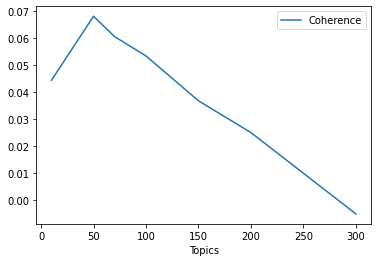

In [80]:
print("Coherence score value by тumber of topic of the LDA model")
pd_lda_results.plot(x="Topics", y="Coherence")
plt.show()

## LDA Model with the highest Coherence measure (Number of topics = 50)

In [74]:
lda_model_opt = models.LdaModel(
   corpus=corpus, 
   id2word=dictionary, 
   num_topics=50, 
   random_state=1, 
#   update_every=1, 
   chunksize=1000, 
   passes=10, 
   alpha='auto', 
   per_word_topics=True
)

In [82]:
CV_opt = compute_coherence(lda_model_opt, norm_tokenized_corpus, corpus, dictionary)
print(CV_opt)

0.08413854733557205


In [84]:
res_df = pd.read_csv('/content/drive/MyDrive/FU_NLP_Project/results.csv', sep = '|')
res_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
res_df = res_df.append({'model': 'LDA',
                        'num_topics': lda_model_opt.num_topics,  'c_npmi': CV_opt} , 
                    ignore_index=True)
res_df.to_csv('/content/drive/MyDrive/FU_NLP_Project/results.csv', sep = '|')

In [85]:
for topic_id in range(lda_model_opt.num_topics):
    topk = lda_model_opt.show_topic(topic_id,10)
    topk_words = [ w for w, _ in topk ]
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: white black red color blue horse dog cat puerto breed
1: school university student college education program ha year research campus
2: series episode show season television character doctor first tv appeared
3: airport international airline flight brazil brazilian malay airlines portuguese malaysia
4: court law case police act may state report legal crime
5: population century island people land region th many province area
6: may disease patient ha treatment cell study effect drug cause
7: air aircraft ship flight first pilot mission two wing navy
8: specie animal tree plant bird ha fish found female may
9: used use often usually made may one design many type
10: century th period temple known ancient one stone ha found
11: bank tax rate price market government cost country economic financial
12: engine car model vehicle new design production version v mm
13: building house street hall room store built new design construction
14: city area town park ha road district located county

Topic #22:
0.026*"season" + 0.024*"team" + 0.021*"game" + 0.013*"yard" + 0.012*"first" + 0.012*"football" + 0.011*"coach" + 0.009*"year" + 0.007*"record" + 0.007*"career" + 0.007*"played" + 0.007*"point" + 0.007*"bowl" + 0.007*"league" + 0.007*"second" + 0.006*"basketball" + 0.006*"player" + 0.006*"field" + 0.006*"touchdown" + 0.006*"nfl"


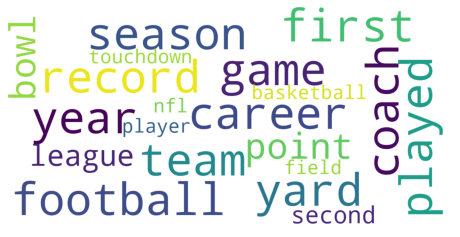

Topic #4:
0.065*"airport" + 0.031*"international" + 0.023*"airline" + 0.023*"flight" + 0.019*"brazil" + 0.017*"brazilian" + 0.016*"malay" + 0.016*"airlines" + 0.015*"portuguese" + 0.014*"malaysia" + 0.013*"terminal" + 0.013*"passenger" + 0.012*"rio" + 0.012*"air" + 0.012*"singapore" + 0.012*"ha" + 0.012*"da" + 0.010*"runway" + 0.010*"thai" + 0.008*"cuban"


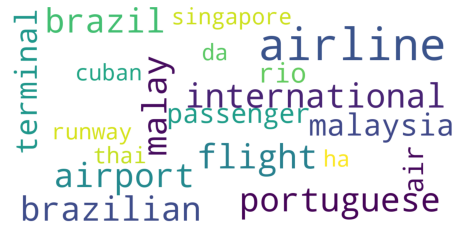

Topic #25:
0.123*"game" + 0.053*"player" + 0.015*"series" + 0.015*"card" + 0.014*"ball" + 0.013*"play" + 0.013*"baseball" + 0.012*"run" + 0.010*"major" + 0.010*"hit" + 0.009*"league" + 0.008*"one" + 0.008*"home" + 0.008*"first" + 0.008*"played" + 0.008*"two" + 0.007*"score" + 0.006*"ha" + 0.006*"level" + 0.006*"inning"


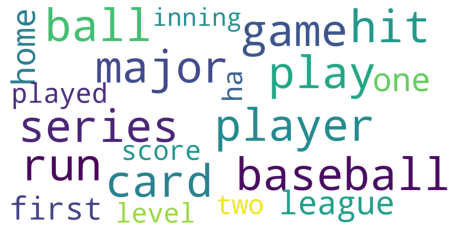

Topic #34:
0.011*"king" + 0.010*"year" + 0.009*"son" + 0.008*"later" + 0.008*"death" + 0.008*"family" + 0.007*"died" + 0.007*"became" + 0.007*"time" + 0.006*"first" + 0.006*"would" + 0.005*"royal" + 0.005*"father" + 0.005*"war" + 0.004*"john" + 0.004*"ii" + 0.004*"william" + 0.004*"took" + 0.004*"two" + 0.004*"one"


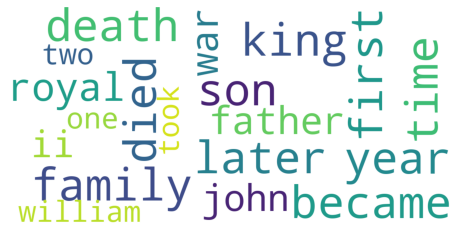

Topic #28:
0.016*"would" + 0.015*"said" + 0.012*"one" + 0.011*"time" + 0.008*"like" + 0.006*"day" + 0.006*"people" + 0.006*"make" + 0.005*"say" + 0.005*"could" + 0.005*"even" + 0.005*"stated" + 0.005*"never" + 0.005*"review" + 0.004*"saying" + 0.004*"way" + 0.004*"get" + 0.004*"good" + 0.004*"much" + 0.004*"gave"


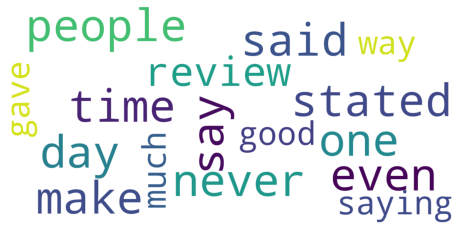

Topic #37:
0.012*"new" + 0.008*"john" + 0.008*"york" + 0.007*"american" + 0.006*"later" + 0.006*"year" + 0.005*"born" + 0.005*"california" + 0.005*"smith" + 0.005*"james" + 0.005*"early" + 0.004*"life" + 0.004*"los" + 0.004*"angeles" + 0.004*"david" + 0.004*"career" + 0.004*"first" + 0.004*"began" + 0.004*"michael" + 0.004*"city"


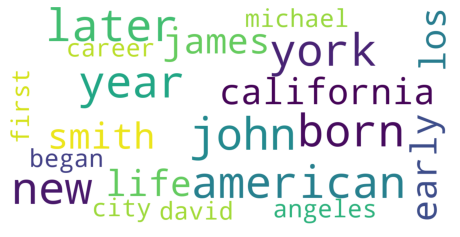

In [86]:
for topic_id, topic in lda_model_opt.print_topics(num_topics=6, num_words=20):
    print('Topic #'+str(topic_id+1)+':')
    print(topic)
    show_wordcloud(topic)
    plt.show()

# BERTopic model (Distilbert Embeddings)

## Embeddings

In [ ]:
articles = data['article'].tolist()

In [34]:
norm_articles = data['normalized_article'].tolist()

In [141]:
sentence_model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = sentence_model.encode(articles, show_progress_bar=True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

In [142]:
#with open('/content/drive/MyDrive/FU_NLP_Project/models/sentence_model_embeddings', 'wb') as SM_embeddings_file:
#    pickle.dump(embeddings, SM_embeddings_file)

In [ ]:
with open ('/content/drive/MyDrive/FU_NLP_Project/models/sentence_model_embeddings', 'rb') as SM_embeddings_file:
    embeddings = pickle.load(SM_embeddings_file)

## Topic model

In [ ]:
BERT_model = BERTopic(language="English") 
BERT_topics, BERT_probabilities = BERT_model.fit_transform(articles, embeddings)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
#topic -1 represents outliers
BERT_model.get_topic_freq().head(10)

Topic  Count
0     -1  22149
1      0   1531
2      1    864
3      2    759
4      3    614
5      4    602
6      5    572
7      6    498
8      7    486
9      8    413

In [ ]:
#BERT_model.save('/content/drive/MyDrive/FU_NLP_Project/models/BERTopic_model_')

In [ ]:
#BERT_model = BERTopic.load('/content/drive/MyDrive/FU_NLP_Project/models/BERTopic_model_')

In [ ]:
BERT_model.visualize_topics()

## Dimensionality reduction and clusterization

In [ ]:
import umap.umap_ as umap
umap_embeddings = umap.UMAP(n_neighbors=25, 
                            n_components=8, 
                            metric='cosine').fit_transform(embeddings)

In [ ]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=25,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [44]:
def visualize_clusters(embeddings, cluster, model_name, n_neighbors = 15):
    umap_data = umap.UMAP(n_neighbors=n_neighbors, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
    df_clusters = pd.DataFrame(umap_data, columns=['x', 'y'])
    df_clusters['labels'] = cluster.labels_
    file_name = "df_clusters_" + model_name + '.csv'
    df_clusters.to_csv(os.path.join('/content/drive/MyDrive/FU_NLP_Project/',file_name), sep = '|')

    # Visualize clusters
    fig, ax = plt.subplots(figsize=(20, 10))
    outliers = df_clusters.loc[df_clusters.labels == -1, :]
    clustered = df_clusters.loc[df_clusters.labels != -1, :]
    plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
    plt.colorbar()
    return df_clusters

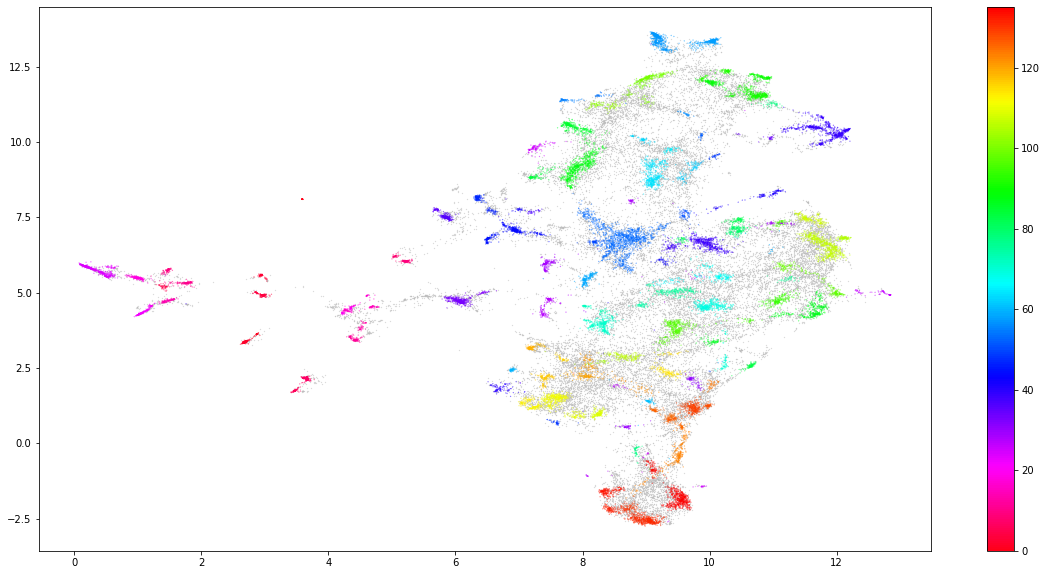

In [ ]:
df_clusters = visualize_clusters(embeddings, cluster, "BERTopic_sent_em")

In [ ]:
df_clusters['labels'].value_counts()

-1      28068
 53      1252
 39       796
 88       652
 24       611
        ...  
 73        28
 79        28
 52        27
 17        26
 118       25
Name: labels, Length: 137, dtype: int64

In [ ]:
df_clusters.head()

x         y  labels
0  11.906316  5.833975      -1
1   8.738392  2.484143      -1
2   9.960010  6.718546      38
3  11.509783  5.646947      99
4   3.596368  1.737566      -1

## Topic model assessment based on Coherence measure

In [43]:
def compute_coherence_values_BERT(BERT_model, BERT_topics, articles):
    # Preprocess documents
    cleaned_docs = BERT_model._preprocess_text(articles)

    # Extract vectorizer and tokenizer from BERTopic
    vectorizer = BERT_model.vectorizer_model
    tokenizer = vectorizer.build_tokenizer()

    # Extract features for Topic Coherence evaluation
    words = vectorizer.get_feature_names()
    tokens = [tokenizer(doc) for doc in cleaned_docs]
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    topic_words = [[words for words, _ in BERT_model.get_topic(topic)] 
                for topic in range(len(set(BERT_topics))-1)]
    coherence_model_nmpi = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
    return coherence_model_nmpi.get_coherence()

In [ ]:
BERT_coherence = compute_coherence_values_BERT(BERT_model,BERT_topics, articles)
print('BERTopic model with SentenceTransformer Embeddings:', BERT_coherence)

BERTopic model with SentenceTransformer Embeddings: 0.0495829578447571


In [ ]:
res_df = pd.read_csv('/content/drive/MyDrive/FU_NLP_Project/results.csv', sep = '|')
res_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
res_df = res_df.append({'model': 'BERTopic (Distilbert Embeddings)',
                        'num_topics': df_clusters['labels'].nunique(),  'c_npmi': BERT_coherence} , 
                    ignore_index=True)
res_df.to_csv('/content/drive/MyDrive/FU_NLP_Project/results.csv', sep = '|')

## Representation of topics

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FU_NLP_Project/data/wiki_sample_normalized_small.csv', sep = '|')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

id  ...                                             tokens
0   wikipedia-4592186  ...  ['sheikhupura', 'district', 'shaikhupur', 'dis...
1  wikipedia-28634877  ...  ['isaac', 'miria', 'numerous', 'publication', ...
2   wikipedia-2319918  ...  ['stewarts', 'melville', 'college', 'stewarts'...
3   wikipedia-1788535  ...  ['khas', 'people', 'originally', 'khas', 'khas...
4  wikipedia-19727355  ...  ['nicole', 'matthews', 'nicole', 'matthews', '...

[5 rows x 4 columns]

In [ ]:
df_clusters = pd.read_csv('/content/drive/MyDrive/FU_NLP_Project/df_clusters_BERTopic_sent_em.csv', sep = '|')
df_clusters.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_clusters.head()

x         y  labels
0  11.906316  5.833975      -1
1   8.738392  2.484143      -1
2   9.960010  6.718546      38
3  11.509783  5.646947      99
4   3.596368  1.737566      -1

In [ ]:
data['clusters_BERT1'] = df_clusters['labels']

In [ ]:
articles_per_topic = data.groupby(['clusters_BERT1'], as_index = False).agg({'normalized_article': ' '.join})

In [42]:
#implementation of c_tf_idf from https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range).fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

In [ ]:
tf_idf, count = c_tf_idf(articles_per_topic.normalized_article.values, m=data.shape[0])

In [41]:
#implementation of c_tf_idf from https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic,topic_column_name, n=12):
    words = count.get_feature_names()
    labels = list(docs_per_topic[topic_column_name])
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

In [ ]:
top_n_words = extract_top_n_words_per_topic(tf_idf, count, articles_per_topic,topic_column_name = 'clusters_BERT1',  n=20)

In [ ]:
df_clusters['labels'].value_counts()

-1      28068
 53      1252
 39       796
 88       652
 24       611
        ...  
 73        28
 79        28
 52        27
 17        26
 118       25
Name: labels, Length: 137, dtype: int64

In [ ]:
df_top_clusters = df_clusters['labels'].value_counts().rename_axis('labels').reset_index(name='num_of_docs')
df_top_clusters.sort_values(by = ['num_of_docs'], axis=0, inplace = True, ascending=False)

In [ ]:
df_top_clusters.head()

labels  num_of_docs
0      -1        28068
1      53         1252
2      39          796
3      88          652
4      24          611

In [ ]:
df_top_clusters.tail()

labels  num_of_docs
132      73           28
133      79           28
134      52           27
135      17           26
136     118           25

In [ ]:
df_top_clusters.loc[df_top_clusters.shape[0]-3:df_top_clusters.shape[0]-1,'labels']

134     52
135     17
136    118
Name: labels, dtype: int64

Label:  53 . Number of documents:  1252 . Top words:
[('store', 0.004775820365322052), ('billion', 0.004501289603443539), ('business', 0.0036975409650407383), ('acquired', 0.0036631315317995896), ('market', 0.0036069512292911414), ('subsidiary', 0.003600108979963161), ('bank', 0.0035757171214315267), ('brand', 0.0035413139049200923), ('product', 0.003508400442485571), ('corporation', 0.003248427145460793), ('investment', 0.003236286678122339), ('customer', 0.003200113829843425), ('company', 0.0030878614335121523), ('stock', 0.0030362623388455945), ('sale', 0.0028668792414672907), ('firm', 0.0028443602338194458), ('share', 0.0027858553172665458), ('largest', 0.002778748958878619), ('inc', 0.0027220758110970454), ('oil', 0.0026847465338262692)]


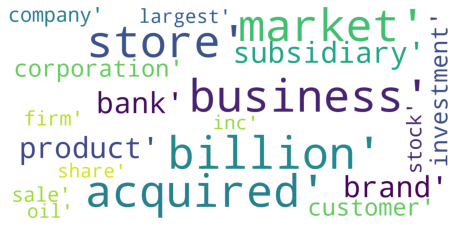

Label:  39 . Number of documents:  796 . Top words:
[('specie', 0.013504458498664532), ('breed', 0.008764713758049129), ('fish', 0.008357787536835934), ('dog', 0.0077784762041230434), ('bird', 0.006839080126544124), ('breeding', 0.006536811402994456), ('genus', 0.0064900785887360285), ('male', 0.006405530956588135), ('habitat', 0.006031775794590954), ('prey', 0.006029563953815594), ('female', 0.005919318244451121), ('nest', 0.005177983160657023), ('tail', 0.005112545885758243), ('egg', 0.005054268044885331), ('subspecies', 0.005029367034084012), ('predator', 0.0048094278359600146), ('insect', 0.00463807528817096), ('cat', 0.004541048562019219), ('animal', 0.004536809218963723), ('fishing', 0.004525232303447335)]


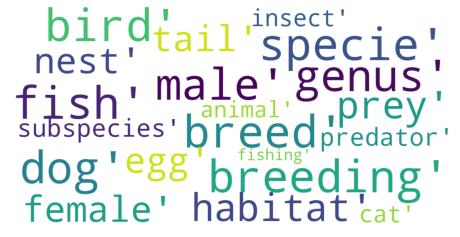

Label:  88 . Number of documents:  652 . Top words:
[('windows', 0.015896568560482674), ('file', 0.014273844716362045), ('server', 0.012901716234093282), ('user', 0.01081196281475145), ('codice', 0.009507133535744615), ('application', 0.008185904466375519), ('software', 0.007681099026616051), ('data', 0.007496177859610759), ('web', 0.00712206499913856), ('java', 0.006906544623995276), ('database', 0.006628704871019261), ('microsoft', 0.006625766703351047), ('browser', 0.006470684433834739), ('interface', 0.006402300193554461), ('google', 0.0062025865468060375), ('code', 0.005991819311992954), ('operating', 0.005888935220581942), ('linux', 0.005661099097147218), ('os', 0.005594424847088789), ('computer', 0.005590328048727636)]


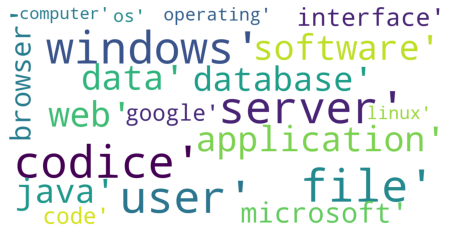

In [ ]:
for label, num in zip(df_top_clusters.loc[1:3,'labels'].tolist(), df_top_clusters.loc[1:3,'num_of_docs'].tolist()):
    print("Label: ", label, ". Number of documents: ", num, ". Top words:")
    print(top_n_words[label])
    show_wordcloud(top_n_words[label])
    plt.show()

Label:  52 . Number of documents:  27 . Top words:
[('health', 0.03753718655209271), ('dmf', 0.03033061516388851), ('patient', 0.02670916298018354), ('healthcare', 0.02233129193891668), ('care', 0.021990198163527232), ('medical', 0.020414925279920608), ('dmfs', 0.017350361186687854), ('prescription', 0.017245225915679625), ('ehr', 0.015664292230108165), ('information', 0.014541755279527916), ('physician', 0.013504103827875548), ('electronic', 0.011984254599172305), ('mhealth', 0.011090154384591166), ('provider', 0.010153518360160404), ('practitioner', 0.009788481031560473), ('emr', 0.00952487199044588), ('telehealth', 0.009161431882923137), ('nurse', 0.009122711815616046), ('privacy', 0.008675552894467977), ('clinical', 0.008457923488854104)]


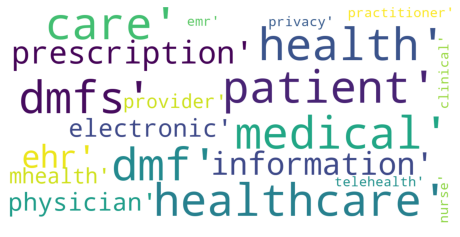

Label:  17 . Number of documents:  26 . Top words:
[('stakes', 0.04368440597080868), ('race', 0.03454966150620093), ('jockey', 0.029725582924315777), ('pigeon', 0.02855439994015596), ('racing', 0.02733568158245107), ('preakness', 0.026449757755925462), ('breeders', 0.025676489686795152), ('anita', 0.024020275586356863), ('derby', 0.02330608219691585), ('horse', 0.022446823283275026), ('zenyatta', 0.02242787455415914), ('mccoy', 0.02013426422800516), ('rachel', 0.01973927392296088), ('winner', 0.018993857425828084), ('alexandra', 0.018039606012503588), ('filly', 0.017774512451605825), ('santa', 0.014900573475683887), ('thoroughbred', 0.014579590530825873), ('handicap', 0.012872190176904096), ('trainer', 0.011463844845254468)]


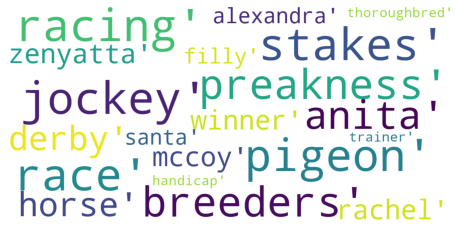

Label:  118 . Number of documents:  25 . Top words:
[('narn', 0.03581253580291866), ('zerg', 0.03140473045467553), ('protoss', 0.024738507113212356), ('centauri', 0.019555388330369704), ('macross', 0.016824575502495127), ('shiar', 0.0165968352971436), ('jemhadar', 0.015259995549108962), ('planet', 0.012840512662733557), ('terran', 0.012407847219189897), ('starcraft', 0.012204076893957229), ('matrix', 0.01185189132377052), ('xelnaga', 0.011809512073142075), ('tleilaxu', 0.01069736562421789), ('overmind', 0.009495456239503874), ('sdf', 0.008310854848624465), ('terrans', 0.008270472189319925), ('kouji', 0.008176349534827492), ('mazinkaiser', 0.008066487384726841), ('jaxur', 0.00780669176485502), ('homeworld', 0.0074641455600497255)]


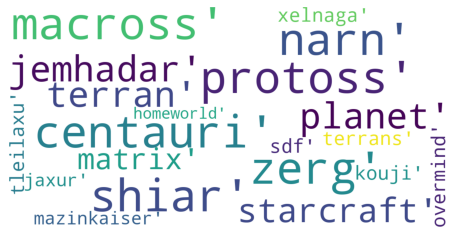

In [ ]:
for label, num in zip(df_top_clusters.loc[df_top_clusters.shape[0]-3:df_top_clusters.shape[0]-1,'labels'].tolist(), df_top_clusters.loc[df_top_clusters.shape[0]-3:df_top_clusters.shape[0]-1,'num_of_docs'].tolist()):
    print("Label: ", label, ". Number of documents: ", num, ". Top words:")
    print(top_n_words[label])
    show_wordcloud(top_n_words[label])
    plt.show()

# BERTopic model (BERT all-MiniLM Embeddings)

## Embeddings

In [29]:
embedding_model2 = SentenceTransformer("all-MiniLM-L6-v2")

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [35]:
embeddings2 = embedding_model2.encode(norm_articles, show_progress_bar=True)

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

In [ ]:
with open('/content/drive/MyDrive/FU_NLP_Project/models/sentence_model_embeddings2', 'wb') as SM_embeddings_file:
    pickle.dump(embeddings2, SM_embeddings_file)

In [ ]:
with open ('/content/drive/MyDrive/FU_NLP_Project/models/sentence_model_embeddings2', 'rb') as SM_embeddings_file:
    embeddings2 = pickle.load(SM_embeddings_file)

## Topic model

In [60]:
#model all-MiniLM-L6-v2 with high speed and good perormance
#https://www.sbert.net/docs/pretrained_models.html

BERT_model2 = BERTopic(language="English", embedding_model=embedding_model2)
BERT_topics2, BERT_probabilities2 = BERT_model2.fit_transform(norm_articles, embeddings2)

In [61]:
BERT_model2.get_topic_freq().head(10)

Topic  Count
0     -1  16466
1      0   4540
2      1   1063
3      2    788
4      3    625
5      4    499
6      5    415
7      6    357
8      7    315
9      8    308

In [ ]:
#BERT_model2.save('/content/drive/MyDrive/FU_NLP_Project/models/BERTopic_model2')

In [ ]:
#BERT_model2 = BERTopic2.load('/content/drive/MyDrive/FU_NLP_Project/models/BERTopic_model2')

In [38]:
BERT_model2.visualize_topics()

## Dimensionality reduction and clusterization

In [39]:
umap_embeddings2 = umap.UMAP(n_neighbors=25, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings2)

In [40]:
cluster2 = hdbscan.HDBSCAN(min_cluster_size=25,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings2)

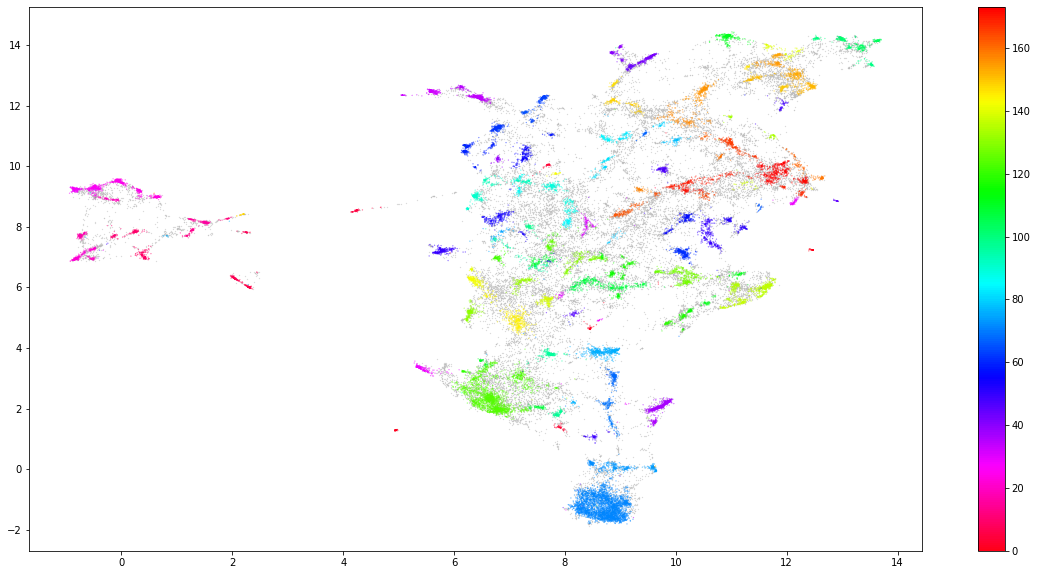

In [45]:
df_clusters2 = visualize_clusters(embeddings2, cluster2, "BERTopic_sent_em2")

In [46]:
df_clusters2['labels'].value_counts()

-1      23674
 71      3328
 124     1798
 37       733
 50       656
        ...  
 169       26
 121       26
 66        25
 45        25
 164       25
Name: labels, Length: 175, dtype: int64

## Topic model assessment based on Coherence measure

In [47]:
BERT_coherence2 = compute_coherence_values_BERT(BERT_model2, BERT_topics2, norm_articles)
print('BERTopic model with SentenceTransformer Embeddings all-MiniLM-L6-v2:', BERT_coherence2)

BERTopic model with SentenceTransformer Embeddings all-MiniLM-L6-v2: 0.1669746892599824


In [48]:
res_df = pd.read_csv('/content/drive/MyDrive/FU_NLP_Project/results.csv', sep = '|')
res_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
res_df = res_df.append({'model': 'BERTopic (BERT Embeddings all-MiniLM-L6-v2)',
                        'num_topics': df_clusters2['labels'].nunique(),  'c_npmi': BERT_coherence2} , 
                    ignore_index=True)
res_df.to_csv('/content/drive/MyDrive/FU_NLP_Project/results.csv', sep = '|')

## Representation of topics

In [49]:
data = pd.read_csv('/content/drive/MyDrive/FU_NLP_Project/data/wiki_sample_normalized_small.csv', sep = '|')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

id  ...                                             tokens
0   wikipedia-4592186  ...  ['sheikhupura', 'district', 'shaikhupur', 'dis...
1  wikipedia-28634877  ...  ['isaac', 'miria', 'numerous', 'publication', ...
2   wikipedia-2319918  ...  ['stewarts', 'melville', 'college', 'stewarts'...
3   wikipedia-1788535  ...  ['khas', 'people', 'originally', 'khas', 'khas...
4  wikipedia-19727355  ...  ['nicole', 'matthews', 'nicole', 'matthews', '...

[5 rows x 4 columns]

In [50]:
df_clusters = pd.read_csv('/content/drive/MyDrive/FU_NLP_Project/df_clusters_BERTopic_sent_em2.csv', sep = '|')
df_clusters.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_clusters.head()

x         y  labels
0  11.263936  6.051070      -1
1   6.618431  2.597813      -1
2   5.828973  7.216352      50
3  11.371051  5.927035      -1
4   2.315466  6.007548       6

In [51]:
data['clusters_BERT2'] = df_clusters['labels']

In [52]:
articles_per_topic = data.groupby(['clusters_BERT2'], as_index = False).agg({'normalized_article': ' '.join})

In [53]:
tf_idf, count = c_tf_idf(articles_per_topic.normalized_article.values, m=data.shape[0])

In [54]:
top_n_words = extract_top_n_words_per_topic(tf_idf, count, articles_per_topic,topic_column_name = 'clusters_BERT2',  n=20)

In [55]:
#3 topics with max number of articles and min number of articles:
df_top_clusters = df_clusters['labels'].value_counts().rename_axis('labels').reset_index(name='num_of_docs')
df_top_clusters.sort_values(by = ['num_of_docs'], axis=0, inplace = True, ascending=False)

In [56]:
df_top_clusters.head()

labels  num_of_docs
0      -1        23674
1      71         3328
2     124         1798
3      37          733
4      50          656

In [57]:
df_top_clusters.tail()

labels  num_of_docs
170     169           26
171     121           26
172      66           25
173      45           25
174     164           25

Label:  71 . Number of documents:  3328 . Top words:
[('band', 0.006625990477603793), ('chart', 0.006497111597169292), ('records', 0.00570299024239751), ('album', 0.004999384680962775), ('tour', 0.004835509987868094), ('track', 0.004795930040492055), ('recording', 0.004783088741004802), ('song', 0.004724634239224941), ('billboard', 0.00451328465636885), ('guitar', 0.004473166550590253), ('vocal', 0.004457824761825376), ('rock', 0.004320377878130446), ('single', 0.004257032172639181), ('recorded', 0.004116599868911527), ('label', 0.0041082550480796105), ('studio', 0.0038569884938401394), ('solo', 0.003702271794280388), ('release', 0.003671042198590025), ('hit', 0.0035899916643490396), ('guitarist', 0.0034459699785424646)]


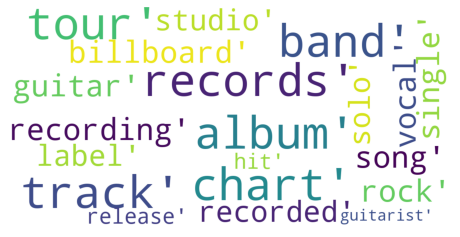

Label:  124 . Number of documents:  1798 . Top words:
[('episode', 0.006441590899217524), ('actress', 0.005012261664054226), ('appeared', 0.00483741885875972), ('starred', 0.0047490777510903505), ('role', 0.004738886778874025), ('comedy', 0.004692107109932205), ('actor', 0.004614500819071305), ('television', 0.004547927319285022), ('drama', 0.0038497741884599983), ('cast', 0.003794800228527295), ('character', 0.00333908780466618), ('guest', 0.003330116161787287), ('tv', 0.0032708642200480397), ('acting', 0.0030716600622714184), ('theatre', 0.0029313374732061427), ('movie', 0.0027415069360593363), ('soap', 0.0026781712585877463), ('starring', 0.0026216209966951785), ('sitcom', 0.0026201325073042956), ('appearance', 0.0025371734582898065)]


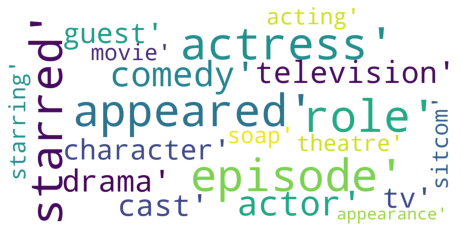

Label:  37 . Number of documents:  733 . Top words:
[('bollywood', 0.009245906837525492), ('movie', 0.0071653329467747), ('kapoor', 0.006758884003798831), ('hindi', 0.006650005576725029), ('actor', 0.0063865011523076935), ('kumar', 0.006035239140498021), ('tamil', 0.005915628746646789), ('indian', 0.005683650206124052), ('khan', 0.005676556236166679), ('telugu', 0.005631857399273652), ('directed', 0.005457766952452797), ('mumbai', 0.005242614631769571), ('actress', 0.004798515142884754), ('malayalam', 0.004618789956143225), ('cinema', 0.004434748499084489), ('vijay', 0.004298420101965039), ('arjun', 0.004262896604433644), ('filmfare', 0.004086041296384778), ('love', 0.0040597962688708545), ('ravi', 0.00398052411622774)]


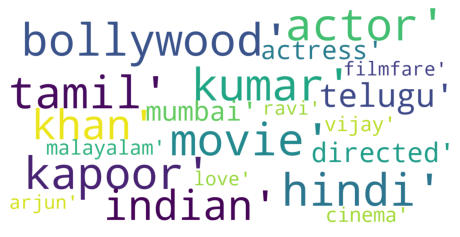

In [58]:
for label, num in zip(df_top_clusters.loc[1:3,'labels'].tolist(), df_top_clusters.loc[1:3,'num_of_docs'].tolist()):
    print("Label: ", label, ". Number of documents: ", num, ". Top words:")
    print(top_n_words[label])
    show_wordcloud(top_n_words[label])
    plt.show()

Label:  66 . Number of documents:  25 . Top words:
[('uv', 0.021361031497148165), ('font', 0.019122367671631293), ('usc', 0.016511884551855864), ('unicode', 0.012589629687972182), ('encoding', 0.012353114188901835), ('arizona', 0.01164972662761951), ('ultraviolet', 0.01046590368595564), ('ua', 0.009496986479794014), ('utf', 0.00814204119565893), ('glyph', 0.006715772836519016), ('gore', 0.006690275963267396), ('uvb', 0.0058718222147741495), ('hkscs', 0.0058617105742320855), ('campus', 0.005749614060243061), ('code', 0.005574470099628048), ('radiation', 0.005554797160942524), ('iso', 0.005541162623231658), ('character', 0.005380054901041559), ('ballot', 0.005371012291625506), ('uscs', 0.005314027909440726)]


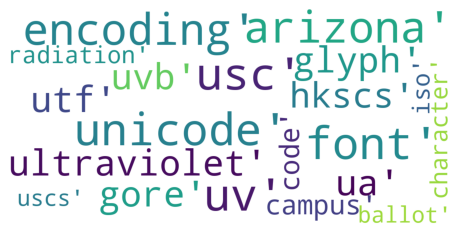

Label:  45 . Number of documents:  25 . Top words:
[('domain', 0.15932854009604), ('toplevel', 0.06616407564398305), ('registration', 0.04455967541861113), ('icann', 0.04093197536057167), ('ly', 0.040878555332257434), ('registry', 0.039297076667438015), ('registrar', 0.038600046202262636), ('cctld', 0.03782799635408424), ('tlds', 0.03349085802321767), ('tld', 0.032836894451697136), ('gtld', 0.03270185715610335), ('gtlds', 0.02839096885527522), ('iana', 0.024625334724860438), ('secondlevel', 0.023729966273964315), ('internet', 0.02261950811262294), ('whois', 0.018186084157107194), ('qa', 0.016259938909831705), ('registrant', 0.016204063706399912), ('thirdlevel', 0.015390114296978038), ('tw', 0.014728704950151324)]


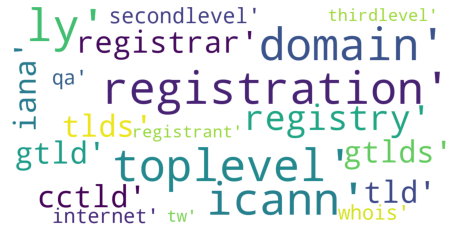

Label:  164 . Number of documents:  25 . Top words:
[('tax', 0.1145474568083456), ('vat', 0.03464639981871946), ('income', 0.02929949145035112), ('fairtax', 0.02350989859306117), ('taxation', 0.023316728224231562), ('transaction', 0.022429436253794933), ('revenue', 0.018610753898007256), ('rate', 0.014583713561297592), ('taxed', 0.010743095596447138), ('flat', 0.010477598831431859), ('sale', 0.010119202315868894), ('financial', 0.009526952993582655), ('taxable', 0.008660520048381602), ('wealth', 0.008390121240685623), ('ftt', 0.008370853292172374), ('deduction', 0.007749265745621085), ('consumption', 0.007141453067456845), ('burden', 0.007015808396406197), ('levied', 0.00697120222146708), ('tobin', 0.006855887725508039)]


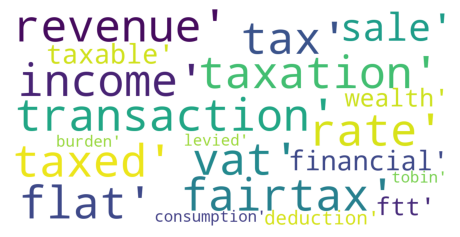

In [59]:
for label, num in zip(df_top_clusters.loc[df_top_clusters.shape[0]-3:df_top_clusters.shape[0]-1,'labels'].tolist(), df_top_clusters.loc[df_top_clusters.shape[0]-3:df_top_clusters.shape[0]-1,'num_of_docs'].tolist()):
    print("Label: ", label, ". Number of documents: ", num, ". Top words:")
    print(top_n_words[label])
    show_wordcloud(top_n_words[label])
    plt.show()

# Topic models assessment

In [87]:
res_df = pd.read_csv('/content/drive/MyDrive/FU_NLP_Project/results.csv', sep = '|')
res_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(res_df)

                                         model  num_topics    c_npmi
0                                          LDA         100  0.070138
1             BERTopic (Distilbert Embeddings)         137  0.049583
2  BERTopic (BERT Embeddings all-MiniLM-L6-v2)         175  0.166975
3                                          LDA          50  0.084139


Coherence measure by model


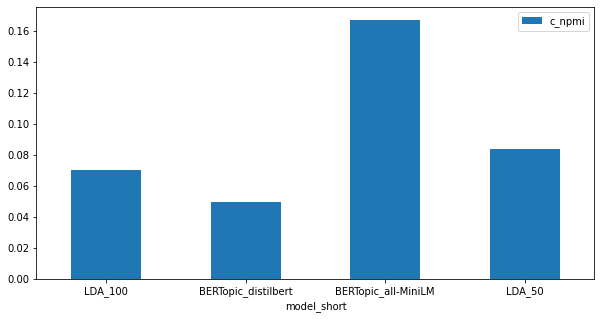

In [92]:
res_df["model_short"] = ['LDA_100','BERTopic_distilbert','BERTopic_all-MiniLM','LDA_50']
print("Coherence measure by model")
res_df.plot.bar(x='model_short', y='c_npmi',figsize = (10,5), rot=0)
plt.show()

Number of topic by model


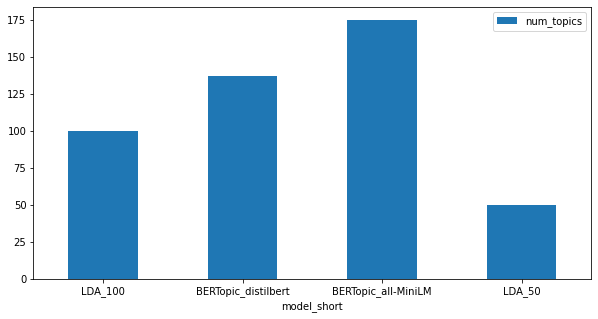

In [94]:
print("Number of topic by model")
res_df.plot.bar(x='model_short', y='num_topics', figsize = (10,5), rot=0)
plt.show()

The model BERTopic with "all-MiniLM" embeddings and the highest number of topics (175) showed the highest value of the coherence measure. Nevertheless, LDA model didnt have the same potential and the LDA with number of topics = 50 had the highest coherence value amoung LDA models with 10, 50, 70, 100, 150, 200 and 300 topics.